# **MACHINE LEARNING**
# **FINAL PROJECT - Team 1**

# TOPIC - "*Predicting the health of the tree*"

*   ### Rohan Niranjan Kalpavruksha
*   ### Roshan Niranjan Kalpavruksha
*   ### Tejomay Pranav Kapadia
*   ### Vedant Rajeev Rawal




# IMPORTING LIBRARIES

In [36]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split

# LOAD THE DATASET

In [37]:
# Load the data from csv file
data = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data_20240403.csv')
pd.set_option('display.max_columns', None)
data.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


# Exploratory Data Analysis (EDA)

In [38]:
# Explore each column of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [39]:
# Checking data shape
data.shape

(683788, 45)

In [40]:
data.describe()

,tree_id,block_id,tree_dbh,stump_diam,postcode,community board,borocode,cncldist,st_assem,st_senate,boro_ct,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,6.837880e+05,683788.000000,683788.000000,6.837880e+05,683788.000000,677269.000000,677269.000000,6.742290e+05,6.742290e+05
mean,365205.011085,313793.096236,11.279787,0.432463,10916.246044,343.505404,3.358500,29.943181,50.791583,20.615781,3.404914e+06,40.701261,-73.924060,1.005280e+06,194798.424625,30.027330,11957.368422,3.495439e+06,3.413414e+09
std,208122.092902,114839.024312,8.723042,3.290241,651.553364,115.740601,1.166746,14.328531,18.966520,7.390844,1.175863e+06,0.090311,0.123583,3.428505e+04,32902.061114,14.301717,30745.739811,1.193275e+06,1.174892e+09
min,3.000000,100002.000000,0.000000,0.000000,83.000000,101.000000,1.000000,1.000000,23.000000,10.000000,1.000201e+06,40.498466,-74.254965,9.133493e+05,120973.792200,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,186582.750000,221556.000000,4.000000,0.000000,10451.000000,302.000000,3.000000,19.000000,33.000000,14.000000,3.011700e+06,40.631928,-73.980500,9.896578e+05,169515.153700,19.000000,202.000000,3.031991e+06,3.011240e+09
50%,366214.500000,319967.000000,9.000000,0.000000,11214.000000,402.000000,4.000000,30.000000,52.000000,21.000000,4.008100e+06,40.700612,-73.912911,1.008386e+06,194560.252500,30.000000,516.000000,4.020352e+06,4.008560e+09
75%,546170.250000,404624.000000,16.000000,0.000000,11365.000000,412.000000,4.000000,43.000000,64.000000,25.000000,4.103202e+06,40.762228,-73.834910,1.029991e+06,217019.571950,43.000000,1417.000000,4.263123e+06,4.105700e+09
max,722694.000000,999999.000000,450.000000,140.000000,11697.000000,503.000000,5.000000,51.000000,87.000000,36.000000,5.032300e+06,40.912918,-73.700488,1.067248e+06,271894.092100,51.000000,157903.000000,5.515124e+06,5.080500e+09


# PRE-PROCESSING - CLEANING DATA

## Checking for missing values

In [41]:
missing_values = data.isnull().sum()
missing_values

tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude                0
longitude   

## Handling missing values

In [42]:
# Separating numerical and categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int', 'float']).columns

In [43]:
# Printing the categorical columns
categorical_cols

Index(['created_at', 'curb_loc', 'status', 'health', 'spc_latin', 'spc_common',
       'steward', 'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'zip_city',
       'borough', 'nta', 'nta_name', 'state'],
      dtype='object')

In [44]:
# Filling the null values of the categorical columns with the mode of that particular column
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [45]:
# Check whether there are any null values after handling missing data
data[categorical_cols].isnull().sum()

created_at    0
curb_loc      0
status        0
health        0
spc_latin     0
spc_common    0
steward       0
guards        0
sidewalk      0
user_type     0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
address       0
zip_city      0
borough       0
nta           0
nta_name      0
state         0
dtype: int64

In [46]:
# Printing the numerical columns
numerical_cols

Index(['tree_id', 'block_id', 'tree_dbh', 'stump_diam', 'postcode',
       'community board', 'borocode', 'cncldist', 'st_assem', 'st_senate',
       'boro_ct', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

## Checking for outliers in numerical columns

In [47]:
# Calculates the z-scores for numerical columns elements and identifies outliers as rows where z-score is greater than 3.
z_scores = data[numerical_cols].apply(lambda x: np.abs((x - x.mean()) / x.std()))
outliers = data[(z_scores > 3).any(axis=1)]

In [48]:
# Prints the Outlier percentage of various numerical columns in descending order
outlier_percentages = (z_scores.sum() / len(data)) * 100
outlier_percentages_sorted = outlier_percentages.sort_values(ascending=False)
outlier_percentages_sorted

st_assem            87.381706
tree_id             86.501894
st_senate           85.562278
cncldist            84.767698
council district    83.953797
boro_ct             83.843237
borocode            83.631282
community board     83.489011
bbl                 82.685429
bin                 82.410458
y_sp                81.879229
latitude            81.866498
block_id            78.658111
longitude           77.943341
x_sp                77.909780
tree_dbh            77.588678
postcode            76.234975
census tract        57.438220
stump_diam          25.608927
dtype: float64

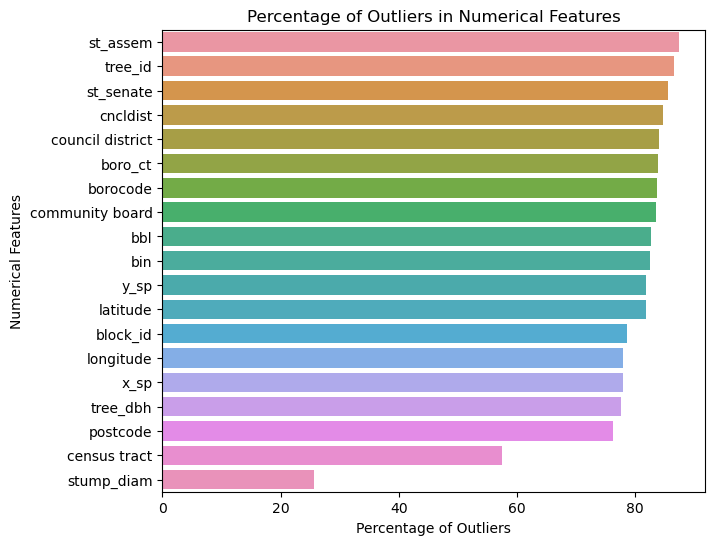

In [49]:
# Plots a graph to represent the percentage of outliers in numerical Features
plt.figure(figsize=(7, 6))
sns.barplot(x=outlier_percentages_sorted.values, y=outlier_percentages_sorted.index)
plt.xlabel('Percentage of Outliers')
plt.ylabel('Numerical Features')
plt.title('Percentage of Outliers in Numerical Features')
plt.show()

## Decide imputation strategy based on outliers - If outliers are present, use median; otherwise, use mean

In [50]:
impute_data = 'median' if len(outliers) > 0 else 'mean'

# Impute missing values based on the selected strategy
if impute_data == 'median':
    impute_values = data[numerical_cols].median()
else:
    impute_values = data[numerical_cols].mean()

data[numerical_cols] = data[numerical_cols].fillna(impute_values)

In [51]:
# Check whether there are any null values after handling missing data
missing_values = data.isnull().sum()
missing_values

tree_id             0
block_id            0
created_at          0
tree_dbh            0
stump_diam          0
curb_loc            0
status              0
health              0
spc_latin           0
spc_common          0
steward             0
guards              0
sidewalk            0
user_type           0
problems            0
root_stone          0
root_grate          0
root_other          0
trunk_wire          0
trnk_light          0
trnk_other          0
brch_light          0
brch_shoe           0
brch_other          0
address             0
postcode            0
zip_city            0
community board     0
borocode            0
borough             0
cncldist            0
st_assem            0
st_senate           0
nta                 0
nta_name            0
boro_ct             0
state               0
latitude            0
longitude           0
x_sp                0
y_sp                0
council district    0
census tract        0
bin                 0
bbl                 0
dtype: int

In [52]:
data.shape

(683788, 45)

### After cleaning now there are 6,83,788 rows in the dataset and 45 columns.

# Data Visualization and Insights

### How healthy are the trees overall in New York?

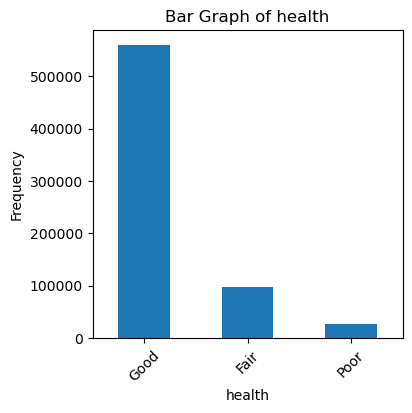

In [53]:
column_name = 'health'
# Count the occurrences of each value in the column
value_counts = data[column_name].value_counts()
# Plotting
plt.figure(figsize=(4, 4))
value_counts.plot(kind='bar')
plt.title('Bar Graph of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### This bar chart shows the overall health of the trees, indicating that the **majority of trees are healthy**, but about **one in seven trees are in sub-healthy condition**, and a small number of trees are in poor health.

### How many trees have helpful guards around them?

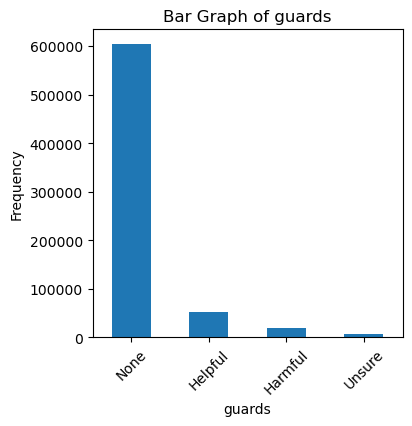

In [54]:
column_name = 'guards'
# Count the occurrences of each value in the column
value_counts = data[column_name].value_counts()
# Plotting
plt.figure(figsize=(4, 4))
value_counts.plot(kind='bar')
plt.title('Bar Graph of {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### This bar chart indicates that **most trees have helpful guards**.

### Where did volunteers collect most data?

<Figure size 1200x800 with 0 Axes>

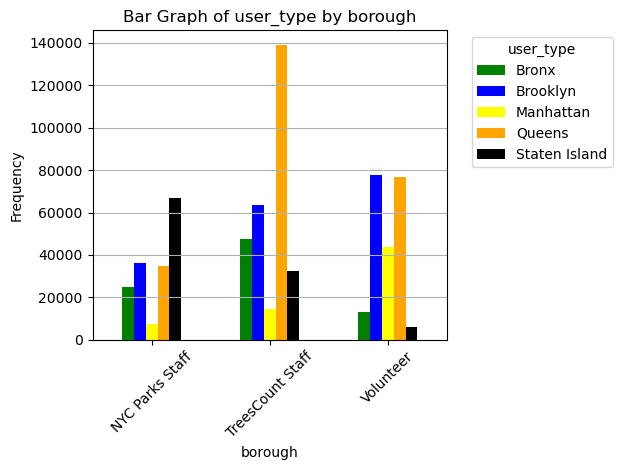

In [55]:
# Assuming 'data' is your DataFrame containing the relevant data

# Define the two columns you want to group by and count
column1_name = 'user_type'
column2_name = 'borough'

# Group by both columns and calculate the value counts
grouped_data = data.groupby([column1_name, column2_name]).size().unstack(fill_value=0)

# Define colors for each user type
colors = {'Brooklyn': 'blue', 'Queens': 'orange', 'Bronx': 'green', 'Manhattan': 'yellow', 'Staten Island': 'black'}

# Plotting
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', color=[colors[col] for col in grouped_data.columns])

plt.title('Bar Graph of {} by {}'.format(column1_name, column2_name))
plt.xlabel(column2_name)
plt.ylabel('Frequency')
plt.legend(title=column1_name, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### The chart above reveals that **Brooklyn, Queens had a greater number of entries by volunteer teams**, while **NYC Parks staff** too contributed a lot for the data in **Staten Island**. Excluding Queens and Bronx **Trees Count staff** were **comparitively behind** in data collection.

## Encoding Categorical Variables

In [56]:
# Perform Label encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [57]:
data.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,319,3,0,1,0,0,11,103,3,2,1,1,46,0,0,0,0,0,0,0,0,0,15839,11375,16,406,4,3,29,28,16,124,65,4073900,0,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,333,21,0,1,0,0,108,96,3,2,0,1,83,1,0,0,0,0,0,0,0,0,80257,11357,45,407,4,3,19,27,11,151,180,4097300,0,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,337,3,0,1,0,1,57,82,0,2,0,2,46,0,0,0,0,0,0,0,0,0,253361,11211,6,301,3,1,34,50,18,45,55,3044900,0,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,337,10,0,1,0,1,57,82,3,2,0,2,83,1,0,0,0,0,0,0,0,0,6469,11211,6,301,3,1,34,53,18,45,55,3044900,0,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,325,21,0,1,0,1,124,6,3,2,0,2,83,1,0,0,0,0,0,0,0,0,317911,11215,6,306,3,1,39,44,21,16,128,3016500,0,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


# Split the data set into Input(X) and Output(Y)


In [58]:
# Splitting the data into features and target variable
X = data.drop(columns=['health'])
y = data['health']

# Split the data into train and test data

In [59]:
# Splitting the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [60]:
# Feature scaling on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
X_train_scaled.shape

(547030, 44)

# Implementing classifiers

In [62]:
# Importing necessary models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

## **Model Training** and its **Evaluation** by plotting a **Confusion Matrix** and via parameters such as - **Accuracy, Precision, Recall and F1 score**

### Decision Tree Classifier

Decision Tree Accuracy: 0.7812486289650331
Decision Tree Precision: 0.7848068058079115
Decision Tree Recall: 0.7812486289650331
Decision Tree F1 Score: 0.7829968356337291
Decision Tree Confusion Matrix:


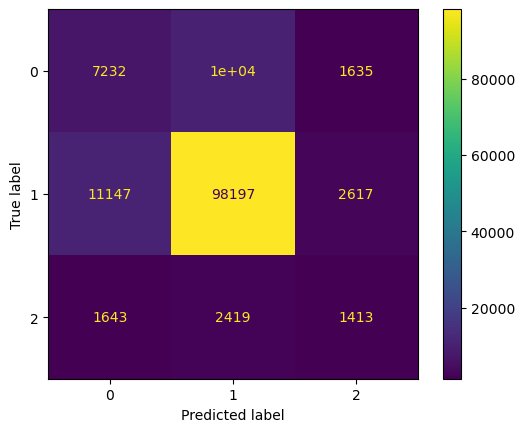

In [64]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_conf = confusion_matrix(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred, average='weighted')
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1)
print("Decision Tree Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(dt_model, X_test_scaled, y_test)
plt.show()

### Gaussian Naive Bayes Classifier

Gaussian Naive Bayes Accuracy: 0.18041357726787463
Gaussian Naive Bayes Precision: 0.8425413786152582
Gaussian Naive Bayes Recall 0.18041357726787463
Gaussian Naive Bayes F1 Score: 0.13103193352377718


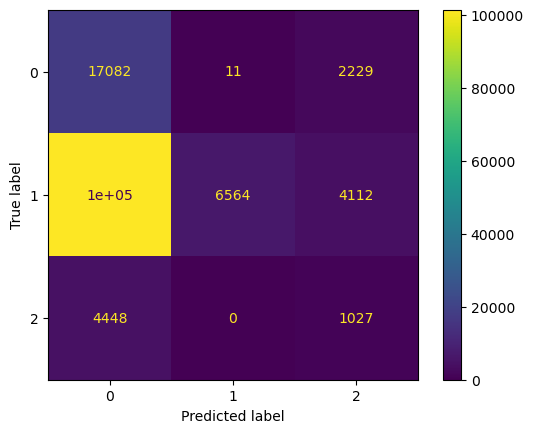

In [65]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
nb_pred = nb_classifier.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='weighted', zero_division=0.0)
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_conf = confusion_matrix(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
print("Gaussian Naive Bayes Accuracy:", nb_accuracy)
print("Gaussian Naive Bayes Precision:", nb_precision)
print("Gaussian Naive Bayes Recall", nb_recall)
print("Gaussian Naive Bayes F1 Score:", nb_f1)
ConfusionMatrixDisplay.from_estimator(nb_classifier, X_test_scaled, y_test)
plt.show()

### Logistic Regression Classifier

C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.818847891896635
Logistic Regression Precision: 0.7482301427955849
Logistic Regression Recall 0.818847891896635
Logistic Regression F1 Score: 0.7440093168206172


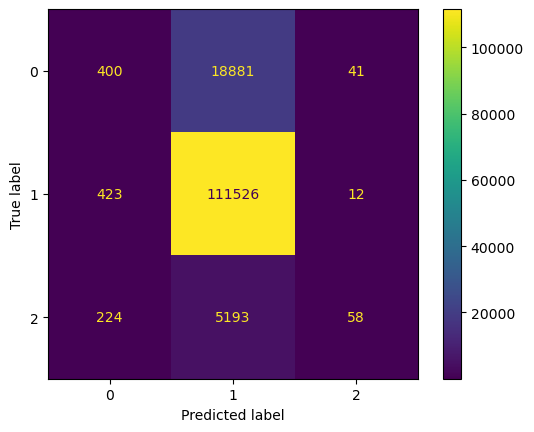

In [66]:
logreg_classifier = LogisticRegression(max_iter=200)
logreg_classifier.fit(X_train_scaled, y_train)
logreg_pred = logreg_classifier.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred, average='weighted', zero_division=0.0)
logreg_recall = recall_score(y_test, logreg_pred, average='weighted')
logreg_conf = confusion_matrix(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred, average='weighted')
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Precision:", logreg_precision)
print("Logistic Regression Recall", logreg_recall)
print("Logistic Regression F1 Score:", logreg_f1)
ConfusionMatrixDisplay.from_estimator(logreg_classifier, X_test_scaled, y_test)
plt.show()

### Random Forest Classifier

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200


[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:   15.9s


building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200building tree 39 of 200

building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67

[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  2.9min


building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200


[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:  4.4min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


262.29454731941223


[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    3.8s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    5.4s finished


Random Forest Accuracy: 0.8391245850334167
Random Forest Precision: 0.8102629800196296
Random Forest Recall 0.8391245850334167
Random Forest F1 Score: 0.8166788097235123


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    3.5s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    5.3s finished


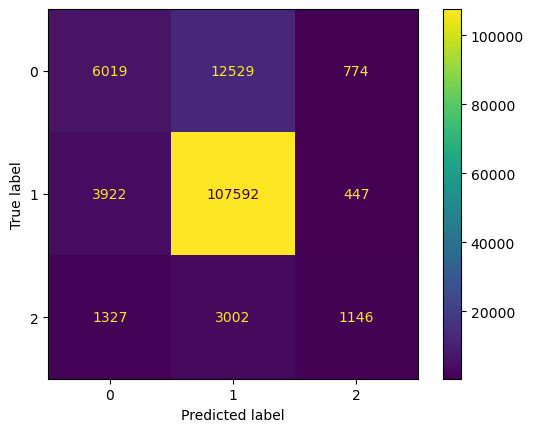

In [67]:
import time
start_time = time.time()
rf_classifier = RandomForestClassifier(random_state=42, verbose=2, n_jobs=16, n_estimators=200)
rf_classifier.fit(X_train_scaled, y_train)
print(time.time() - start_time)
rf_pred = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted', zero_division=0.0)
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_conf = confusion_matrix(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall", rf_recall)
print("Random Forest F1 Score:", rf_f1)
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test_scaled, y_test)
plt.show()

### XGBoost Classifier

XGBoost Accuracy: 0.8284999780634406
XGBoost Precision: 0.7878001685963522
XGBoost Recall 0.8284999780634406
XGBoost F1 Score: 0.7706796304385957


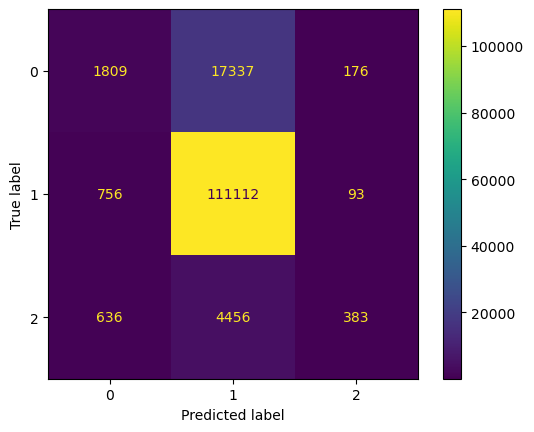

In [68]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')
xgb_conf = confusion_matrix(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall", xgb_recall)
print("XGBoost F1 Score:", xgb_f1)
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_scaled, y_test)
plt.show()

### Stochastic Gradient Descent Classifier

Stochastic Gradient Descent Classifier Accuracy: 0.8186797116073649
Stochastic Gradient Descent Classifier Precision: 0.8515567585901532
Stochastic Gradient Descent Classifier Recall 0.8186797116073649
Stochastic Gradient Descent Classifier F1 Score: 0.7370582801577055


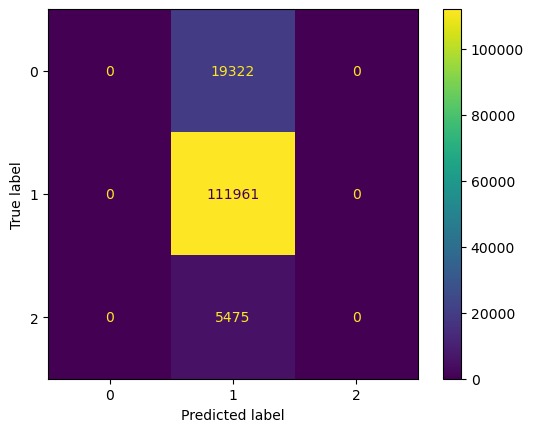

In [69]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train_scaled, y_train)
sgd_pred = sgd_classifier.predict(X_test_scaled)
sgd_accuracy = accuracy_score(y_test, sgd_pred)
sgd_precision = precision_score(y_test, sgd_pred, average='weighted', zero_division=1.0)
sgd_recall = recall_score(y_test, sgd_pred, average='weighted')
sgd_f1 = f1_score(y_test, sgd_pred, average='weighted')
sgd_conf = confusion_matrix(y_test, sgd_pred)
print("Stochastic Gradient Descent Classifier Accuracy:", sgd_accuracy)
print("Stochastic Gradient Descent Classifier Precision:", sgd_precision)
print("Stochastic Gradient Descent Classifier Recall", sgd_recall)
print("Stochastic Gradient Descent Classifier F1 Score:", sgd_f1)
ConfusionMatrixDisplay.from_estimator(sgd_classifier, X_test_scaled, y_test)
plt.show()

### Resampling To Handle Class Imbalance

In [70]:
from imblearn.over_sampling import SMOTE
# Synthetic Oversampling to handle imbalanced classes
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train)
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)
X_train_res.shape

(1076412, 44)

## Re-training Models

### Decision Tree Classifier After Resampling

Decision Tree Accuracy: 0.7812486289650331
Decision Tree Precision: 0.7848068058079115
Decision Tree Recall: 0.7812486289650331
Decision Tree F1 Score: 0.7829968356337291
Decision Tree Confusion Matrix:
[[67573 10113 12076]
 [11438 74799  3085]
 [10194  2638 77187]]


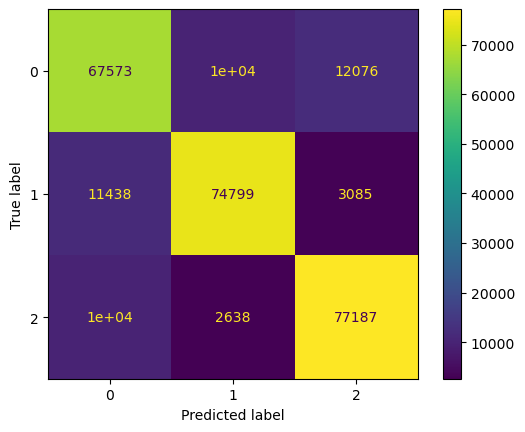

In [71]:
dt_model_res = DecisionTreeClassifier(random_state=42)
dt_model_res.fit(X_train_res, y_train_res)
dt_pred_res = dt_model_res.predict(X_val_res)
dt_accuracy_res = accuracy_score(y_val_res, dt_pred_res)
dt_precision_res = precision_score(y_val_res, dt_pred_res, average='weighted')
dt_recall_res = recall_score(y_val_res, dt_pred_res, average='weighted')
dt_conf_res = confusion_matrix(y_val_res, dt_pred_res)
dt_f1_res = f1_score(y_val_res, dt_pred_res, average='weighted')
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1)
print("Decision Tree Confusion Matrix:")
print(dt_conf_res)
ConfusionMatrixDisplay.from_estimator(dt_model_res, X_val_res, y_val_res)
plt.show()

### Gaussian Naive Bayes Classifier After Resampling

Gaussian Naive Bayes Accuracy (Resampled): 0.3889960349754555
Gaussian Naive Bayes Precision (Resampled): 0.5875805883334639
Gaussian Naive Bayes Recall (Resampled): 0.3889960349754555
Gaussian Naive Bayes F1 Score (Resampled): 0.3353881795377732
[[58514    36 31212]
 [61455  5144 22723]
 [48964    33 41022]]


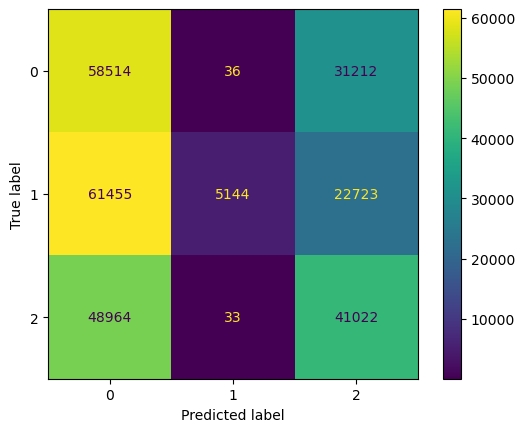

In [72]:
nb_classifier_res = GaussianNB()
nb_classifier_res.fit(X_train_res, y_train_res)
nb_pred_res = nb_classifier_res.predict(X_val_res)
nb_accuracy_res = accuracy_score(y_val_res, nb_pred_res)
nb_precision_res = precision_score(y_val_res, nb_pred_res, average='weighted', zero_division=0.0)
nb_recall_res = recall_score(y_val_res, nb_pred_res, average='weighted')
nb_conf_res = confusion_matrix(y_val_res, nb_pred_res)
nb_f1_res = f1_score(y_val_res, nb_pred_res, average='weighted')
print("Gaussian Naive Bayes Accuracy (Resampled):", nb_accuracy_res)
print("Gaussian Naive Bayes Precision (Resampled):", nb_precision_res)
print("Gaussian Naive Bayes Recall (Resampled):", nb_recall_res)
print("Gaussian Naive Bayes F1 Score (Resampled):", nb_f1_res)
print(nb_conf_res)
ConfusionMatrixDisplay.from_estimator(nb_classifier_res, X_val_res, y_val_res)
plt.show()

### Logistic Regression Classifier After Resampling

C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy (Resampled): 0.4701248220941424
Logistic Regression Precision (Resampled): 0.46464882288261383
Logistic Regression Recall (Resampled): 0.4701248220941424
Logistic Regression F1 Score (Resampled): 0.4630564480362498
[[27655 28241 33866]
 [18152 49040 22130]
 [19993 20209 49817]]


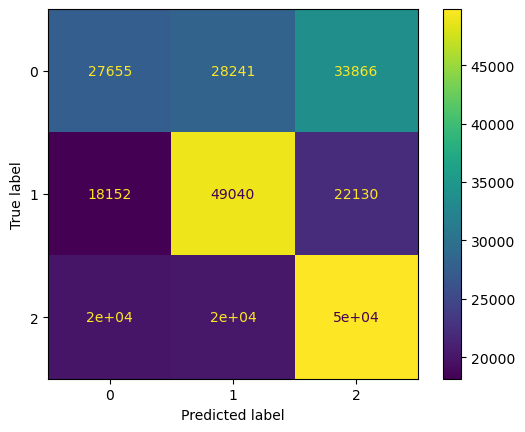

In [73]:
logreg_classifier_res = LogisticRegression()
logreg_classifier_res.fit(X_train_res, y_train_res)
logreg_pred_res = logreg_classifier_res.predict(X_val_res)
logreg_accuracy_res = accuracy_score(y_val_res, logreg_pred_res)
logreg_precision_res = precision_score(y_val_res, logreg_pred_res, average='weighted', zero_division=0.0)
logreg_recall_res = recall_score(y_val_res, logreg_pred_res, average='weighted')
logreg_conf_res = confusion_matrix(y_val_res, logreg_pred_res)
logreg_f1_res = f1_score(y_val_res, logreg_pred_res, average='weighted')
print("Logistic Regression Accuracy (Resampled):", logreg_accuracy_res)
print("Logistic Regression Precision (Resampled):", logreg_precision_res)
print("Logistic Regression Recall (Resampled):", logreg_recall_res)
print("Logistic Regression F1 Score (Resampled):", logreg_f1_res)
print(logreg_conf_res)
ConfusionMatrixDisplay.from_estimator(logreg_classifier_res, X_val_res, y_val_res)
plt.show()

### Random Forest Classifier After Resampling

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200


[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:   59.2s


building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200building tree 43 of 200

building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67

[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  9.0min


building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200


[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed: 13.5min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    4.7s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:   16.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   20.0s finished


Random Forest Accuracy (Resampled): 0.9220149905426547
Random Forest Precision (Resampled): 0.9217749997035748
Random Forest Recall (Resampled): 0.9220149905426547
Random Forest F1 Score (Resampled): 0.9217285643919281
[[78623  6758  4381]
 [ 5644 82814   864]
 [ 2101  1238 86680]]


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    8.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   11.9s finished


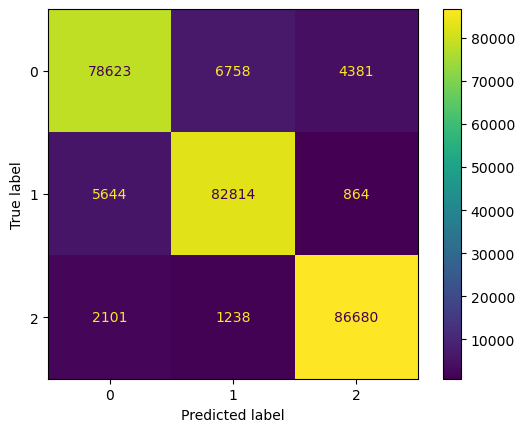

In [74]:
rf_classifier_res = RandomForestClassifier(random_state=42, verbose=2, n_estimators=200, n_jobs=16)
rf_classifier_res.fit(X_train_res, y_train_res)
rf_pred_res = rf_classifier_res.predict(X_val_res)
rf_accuracy_res = accuracy_score(y_val_res, rf_pred_res)
rf_precision_res = precision_score(y_val_res, rf_pred_res, average='weighted', zero_division=0.0)
rf_recall_res = recall_score(y_val_res, rf_pred_res, average='weighted')
rf_conf_res = confusion_matrix(y_val_res, rf_pred_res)
rf_f1_res = f1_score(y_val_res, rf_pred_res, average='weighted')
print("Random Forest Accuracy (Resampled):", rf_accuracy_res)
print("Random Forest Precision (Resampled):", rf_precision_res)
print("Random Forest Recall (Resampled):", rf_recall_res)
print("Random Forest F1 Score (Resampled):", rf_f1_res)
print(rf_conf_res)
ConfusionMatrixDisplay.from_estimator(rf_classifier_res, X_val_res, y_val_res)
plt.show()

### XGBoost Classifier After Resampling

XGBoost Accuracy (Resampled): 0.743596318138408
XGBoost Precision (Resampled): 0.7383066995385761
XGBoost Recall (Resampled): 0.743596318138408
XGBoost F1 Score (Resampled): 0.7323775808213062


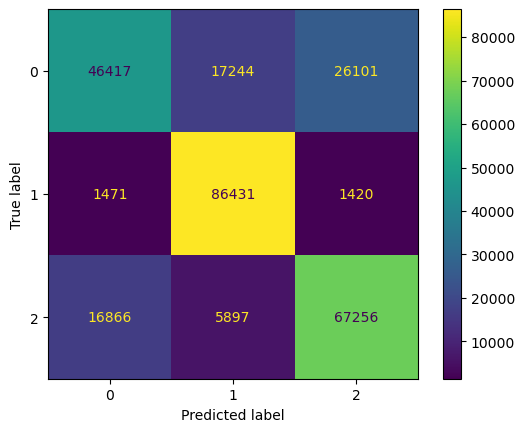

In [75]:
xgb_model_res = xgb.XGBClassifier(random_state=42)
xgb_model_res.fit(X_train_res, y_train_res)
xgb_pred_res = xgb_model_res.predict(X_val_res)
xgb_accuracy_res = accuracy_score(y_val_res, xgb_pred_res)
xgb_precision_res = precision_score(y_val_res, xgb_pred_res, average='weighted')
xgb_recall_res = recall_score(y_val_res, xgb_pred_res, average='weighted')
xgb_f1_res = f1_score(y_val_res, xgb_pred_res, average='weighted')
xgb_conf_res = confusion_matrix(y_val_res, xgb_pred_res)
print("XGBoost Accuracy (Resampled):", xgb_accuracy_res)
print("XGBoost Precision (Resampled):", xgb_precision_res)
print("XGBoost Recall (Resampled):", xgb_recall_res)
print("XGBoost F1 Score (Resampled):", xgb_f1_res)
ConfusionMatrixDisplay.from_estimator(xgb_model_res, X_val_res, y_val_res)
plt.show()

### Stochastic Gradient Descent Classifier After Resampling

Stochastic Gradient Descent Classifier Accuracy (Resampled): 0.4397461195155758
Stochastic Gradient Descent Classifier Precision (Resampled): 0.4220311802574787
Stochastic Gradient Descent Classifier Recall (Resampled): 0.4397461195155758
Stochastic Gradient Descent Classifier F1 Score (Resampled): 0.40867286554200466
[[12958 39129 37675]
 [ 9310 56484 23528]
 [13271 27853 48895]]


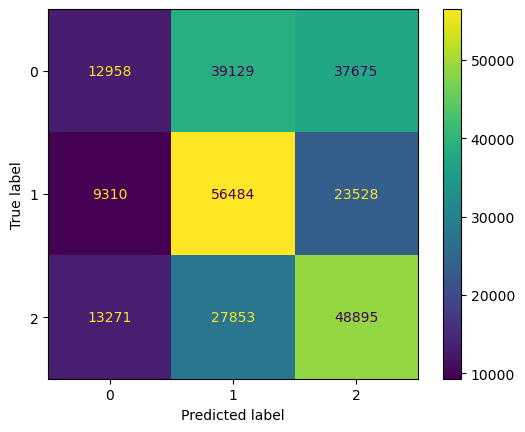

In [76]:
sgd_classifier_res = SGDClassifier()
sgd_classifier_res.fit(X_train_res, y_train_res)
sgd_pred_res = sgd_classifier_res.predict(X_val_res)
sgd_accuracy_res = accuracy_score(y_val_res, sgd_pred_res)
sgd_precision_res = precision_score(y_val_res, sgd_pred_res, average='weighted', zero_division=1.0)
sgd_recall_res = recall_score(y_val_res, sgd_pred_res, average='weighted')
sgd_f1_res = f1_score(y_val_res, sgd_pred_res, average='weighted')
sgd_conf_res = confusion_matrix(y_val_res, sgd_pred_res)
print("Stochastic Gradient Descent Classifier Accuracy (Resampled):", sgd_accuracy_res)
print("Stochastic Gradient Descent Classifier Precision (Resampled):", sgd_precision_res)
print("Stochastic Gradient Descent Classifier Recall (Resampled):", sgd_recall_res)
print("Stochastic Gradient Descent Classifier F1 Score (Resampled):", sgd_f1_res)
print(sgd_conf_res)
ConfusionMatrixDisplay.from_estimator(sgd_classifier_res, X_val_res, y_val_res)
plt.show()

# Showing concepts of Underfitting and overfitting, Applying Kernel Functions, Cross Validation

In [77]:
from sklearn.model_selection import cross_val_score
# Define different SVM classifiers with different kernel functions
svm_linear = SVC(kernel='linear', C=1.0, max_iter=100)
svm_poly = SVC(kernel='poly', degree=3, max_iter=100)  # Polynomial kernel
svm_rbf = SVC(kernel='rbf', max_iter=100)  # Radial Basis Function (RBF) kernel

# Define classifiers dictionary
classifiers = {
    'SVM Linear Kernel': svm_linear,
    'SVM Polynomial Kernel': svm_poly,
    'SVM RBF Kernel': svm_rbf
}

# Perform k-fold cross-validation for each classifier
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_res, y_train_res, cv=5)  # 5-fold cross-validation
    print()
    print(f"{clf_name} - Cross-validation scores: {scores}")
    print(f"{clf_name} - Mean CV accuracy: {np.mean(scores)}")
    print()

# Train and test SVM classifier with RBF kernel
svm_rbf.fit(X_train_res, y_train_res)
predictions_svm_rbf = svm_rbf.predict(X_val_res)
accuracy_svm_rbf = accuracy_score(y_val_res, predictions_svm_rbf)
print()
print("Accuracy of SVM with RBF Kernel:", accuracy_svm_rbf)

C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).


SVM Linear Kernel - Cross-validation scores: [0.3494052  0.32826559 0.3354809  0.34265754 0.35237967]
SVM Linear Kernel - Mean CV accuracy: 0.3416377795906887



C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).


SVM Polynomial Kernel - Cross-validation scores: [0.33246006 0.33109906 0.33288895 0.33291683 0.33398984]
SVM Polynomial Kernel - Mean CV accuracy: 0.33267094921161167



C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).


SVM RBF Kernel - Cross-validation scores: [0.34092334 0.35002299 0.34715861 0.34998746 0.3430663 ]
SVM RBF Kernel - Mean CV accuracy: 0.3462317416724708



C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Accuracy of SVM with RBF Kernel: 0.3420920614039977


C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\kapad\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).

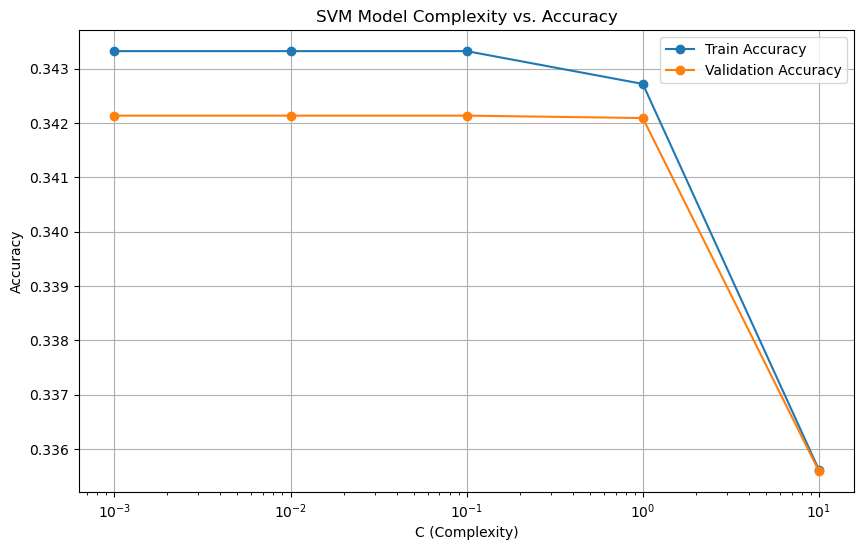

In [78]:
# Showing concepts of Underfitting and overfitting with the help of graph
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define a range of values for the parameter controlling model complexity
C_values = [0.001, 0.01, 0.1, 1, 10]

train_accuracy = []
test_accuracy = []

for C in C_values:
    # Create SVM classifier with RBF kernel and given C value
    svm_rbf = SVC(kernel='rbf', C=C, random_state=42, max_iter=100)

    # Train the model
    svm_rbf.fit(X_train_res, y_train_res)

    # Predict on training and validation sets
    train_predictions = svm_rbf.predict(X_train_res)
    test_predictions = svm_rbf.predict(X_val_res)

    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train_res, train_predictions))
    test_accuracy.append(accuracy_score(y_val_res, test_predictions))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(C_values, test_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('C (Complexity)')
plt.ylabel('Accuracy')
plt.title('SVM Model Complexity vs. Accuracy')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

# Hyperparameter Tuning

#### Taking a random 5% of the data to reduce the training time for cross validation

In [79]:
X_discard, X_sample, y_discard, y_sample = train_test_split(X_train_res, y_train_res, test_size=0.05, random_state=42)

In [80]:
X_sample_train, X_sample_val, y_sample_train, y_sample_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [81]:
X_sample_train.shape

(43056, 44)

### Random Forest Classifier Tuning

In [83]:
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

rf_classifier_tuned = RandomForestClassifier(random_state=42, n_jobs=16, verbose=2)

grid_search_rf = GridSearchCV(rf_classifier_tuned, param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(X_sample_train, y_sample_train)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

best_model_rf = grid_search_rf.best_estimator_

tuned_rf_accuracy = best_model_rf.score(X_sample_val, y_sample_val)
print("Test Accuracy:", tuned_rf_accuracy)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    4.8s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    7.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:   19.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    4.3s
[Parallel(n

[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    4.3s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:   28.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    4.4s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:   26.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[P

[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    4.4s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:   37.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:   37.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[P

[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    7.9s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:  1.2min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    9.4s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:  1.6min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Don

[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:  1.6min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    7.9s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:  1.6min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Don

[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    7.6s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:  1.6min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    9.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:   57.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Don

[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:   10.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  69 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    9.2s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 1

[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:   10.6s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:   33.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    5.3s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:  1.3min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    8.8s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:  1.4min finished
[Parallel(n_jobs=

[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    9.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    9.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    7.9s finished
[Parallel(n_jobs=

[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    8.9s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   13.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    7.5s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   10.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elaps

[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   10.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    9.6s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   12.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Don

[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:   10.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    8.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=

[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    9.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    9.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[P

[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:   18.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:   17.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[P

[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    3.9s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:   18.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:   14.9s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   21.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Don

[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   22.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:   16.6s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   23.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Don

building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200


[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    2.0s


building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68

[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:   21.5s


building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200building tree 160 of 200
building tree 161 of 200

building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200


[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:   31.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.692986530422666


[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 200 out of 200 | elapsed:    0.3s finished


In [84]:
grid_search_rf.best_estimator_.n_estimators

200

In [85]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 2,
 'n_estimators': 200}